## Logistic Regression: Fit and evaluate a model

**In this section, we will fit and evaluate a simple Logistic Regression.**

In [34]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

**Loading the train features and lable features**

In [29]:
tr_features = pd.read_csv("/content/drive/MyDrive/train_features.csv")
tr_labels = pd.read_csv("/content/drive/MyDrive/train_labels.csv", header=None)

In [30]:
def print_results(results):
  print("BEST PARAMS {}\n".format(results.best_params_))

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, stds, params in zip(means, stds, results.cv_results_['params']):
    print('{} (+/- {}) for {}'.format(round(mean,3), round(stds * 2,3), params))

## Hyperparameter tuning

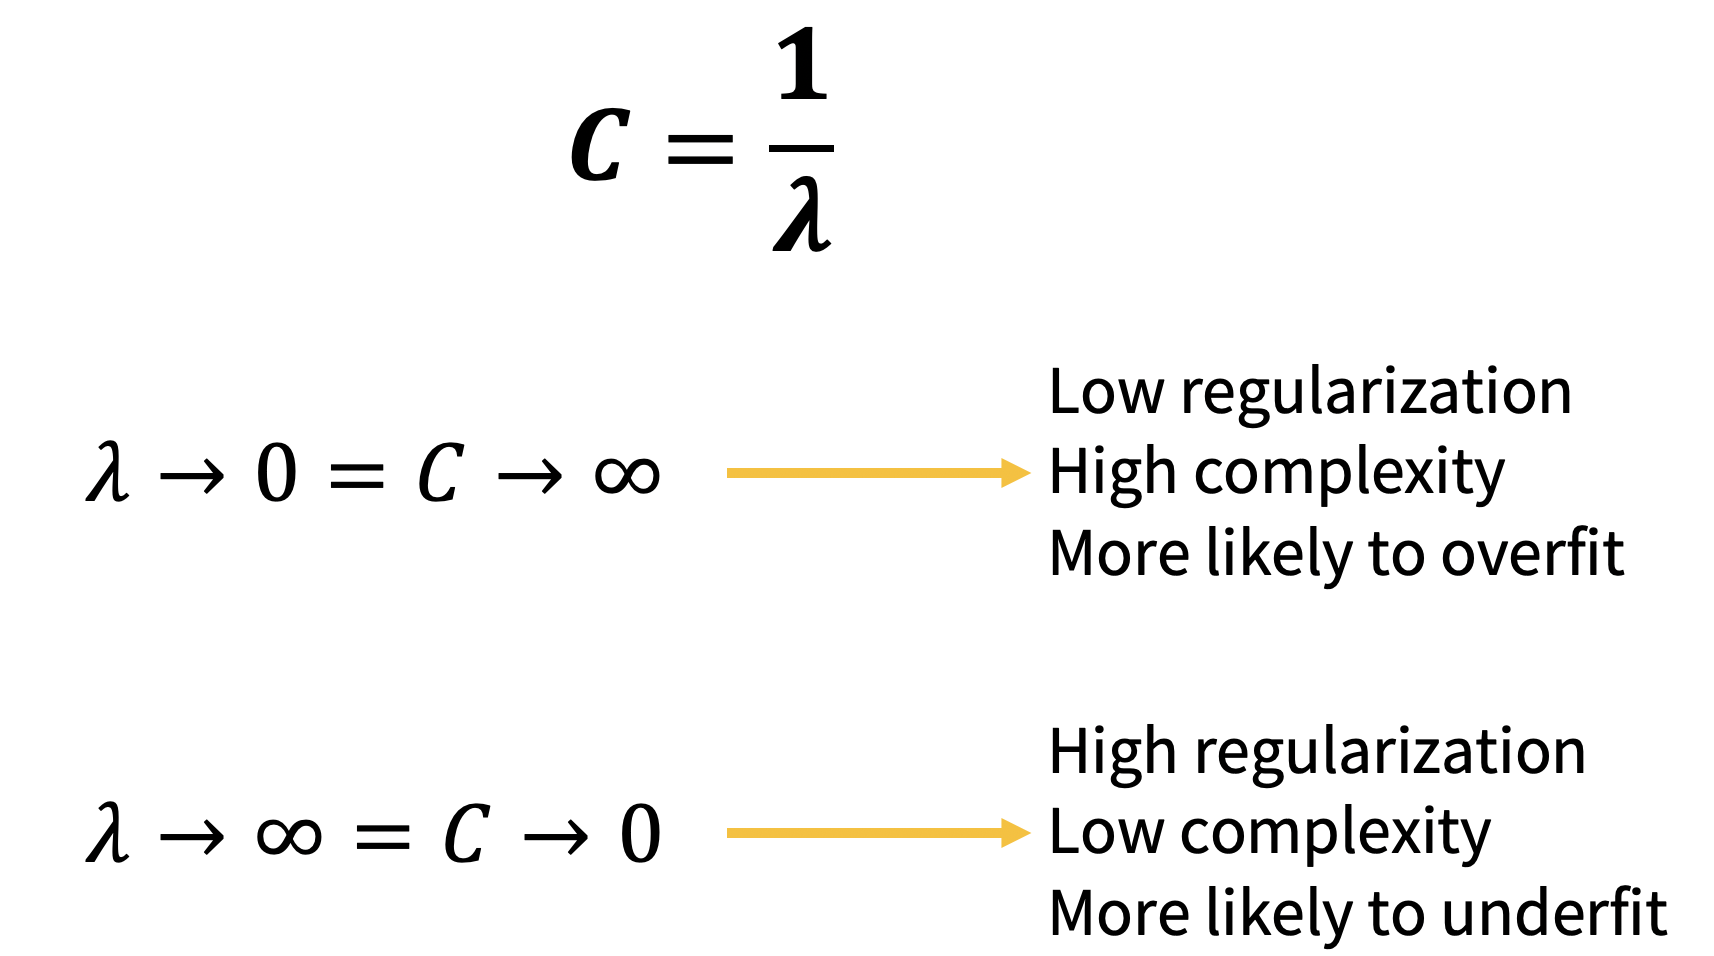

In [35]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS {'C': 1}

0.67 (+/- 0.077) for {'C': 0.001}
0.708 (+/- 0.098) for {'C': 0.01}
0.777 (+/- 0.134) for {'C': 0.1}
0.8 (+/- 0.118) for {'C': 1}
0.794 (+/- 0.116) for {'C': 10}
0.794 (+/- 0.116) for {'C': 100}
0.794 (+/- 0.116) for {'C': 1000}


**Ignore the Warnings**

In [36]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Saving the model**

In [37]:
joblib.dump(cv.best_estimator_,'/content/drive/MyDrive/LR_model.json')

['/content/drive/MyDrive/LR_model.json']